# Assignment 1

## Part 1 - Ridge Regression

Generated coefficients a_k: ['0.343', '0.493', '0.684']


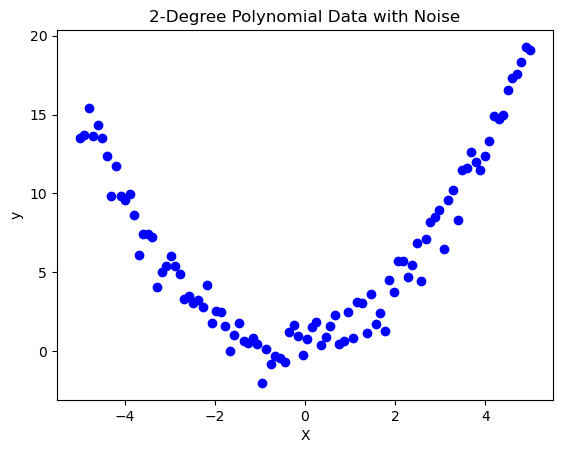

In [47]:
#3.1
import numpy as np
import matplotlib.pyplot as plt

def gengerate_ployData(degree,num_sample):
    #生成x ∈ [−5, 5]之间的num_sample个数据，并转换为列数据
    X = np.linspace(-5, 5, num_sample).reshape(-1, 1)

    #随机生成n阶多项式的系数 a_k∼U(0,1)
    a = np.random.uniform(0, 1, degree + 1)

    #生成一个ϵ∼N(0,1)，大小为 num_sample 的二维数组(1列)
    e = np.random.randn(num_sample, 1)
    
    #最终公式，axis=0 表示沿着纵向计算
    y = np.sum([a[k] * (X**k) for k in range(degree + 1)], axis=0) + e

    return X, y, a

# 测试生成数据
degree = 2  # 假设生成2阶多项式
num_sample = 100  # 样本数量

X, y, coeffs = gengerate_ployData(degree, num_sample)

# 打印生成的系数
print(f"Generated coefficients a_k: {[f'{coeff:.3f}' for coeff in coeffs]}")

# 可视化生成的数据
plt.scatter(X, y, color='blue', label="Generated Data")
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'{degree}-Degree Polynomial Data with Noise')
plt.show()


In [51]:
#3.2

#最小化L(w)的闭式解公式
def cfs_ridgeReg(X, y, alpha):
    # bias trick在特征矩阵X前增加一列全为1，避免对偏置项正则化
    X_bias = np.hstack([np.ones((X.shape[0], 1)),X])

    XtX = np.dot(X_bias.T, X_bias)

    XtY = np.dot(X_bias.T, y)

    #创建正则化矩阵Im，并将第一行，第一列置为0
    Im = np.identity(X_bias.shape[1])
    Im[0, 0] = 0

    #计算逆部分
    XtX_alpha_Im_inv = np.linalg.inv(XtX + alpha * Im)

    w = np.dot(XtX_alpha_Im_inv, XtY)
    
    #输出特征的系数
    return w

# 使用岭回归计算回归系数
alpha = 0.1  # 正则化参数
w = cfs_ridgeReg(X, y, alpha)

# 输出回归系数
print("Custom Ridge Regression : ", w)


Custom Ridge Regression :  [[6.24325246]
 [0.46964147]]


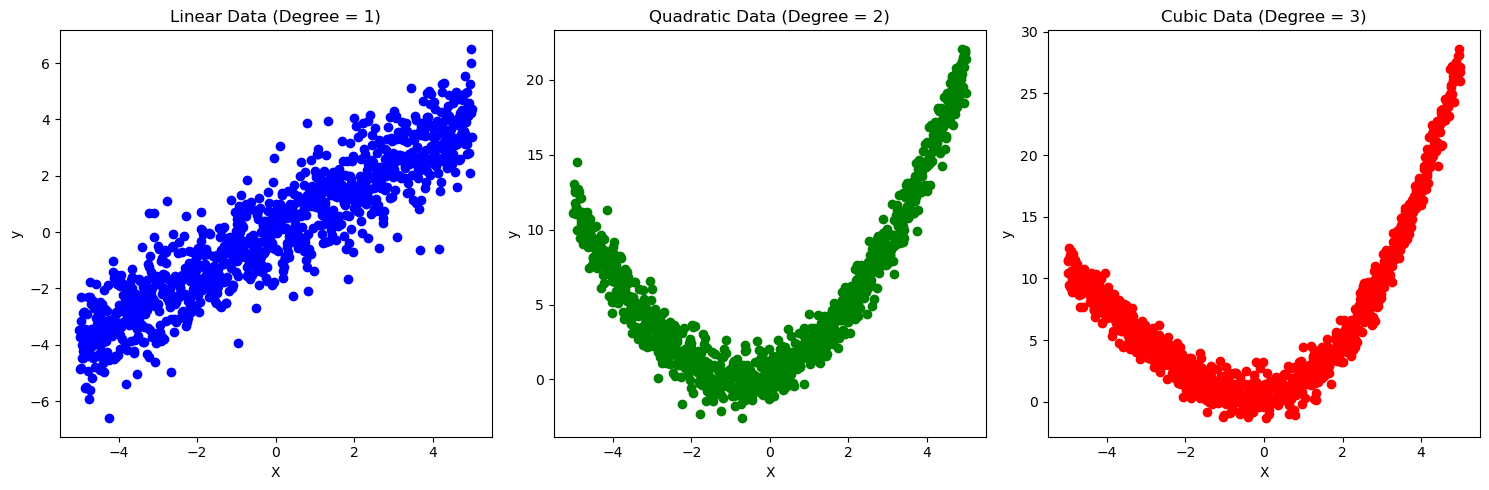

In [49]:
#3.3 Generate three toy datasets

# a linear dataset（degree=1）
X_linear,y_linear, coeffs_linear = gengerate_ployData(degree=1, num_sample=1000)

# A quadratic dataset（degree=2）
X_quadratic,y_quadratic, coeffs_quadratic = gengerate_ployData(degree=2, num_sample=1000)

# A cubic dataset（degree=3）
X_cubic,y_cubic, coeffs_cubic = gengerate_ployData(degree=3, num_sample=1000)

# 绘制数据集
plt.figure(figsize=(15, 5))

# 线性数据集
plt.subplot(1, 3, 1)
plt.scatter(X_linear, y_linear, color='blue', label='Linear data')
plt.title('Linear Data (Degree = 1)')
plt.xlabel('X')
plt.ylabel('y')

# 二次数据集
plt.subplot(1, 3, 2)
plt.scatter(X_quadratic, y_quadratic, color='green', label='Quadratic data')
plt.title('Quadratic Data (Degree = 2)')
plt.xlabel('X')
plt.ylabel('y')

# 三次数据集
plt.subplot(1, 3, 3)
plt.scatter(X_cubic, y_cubic, color='red', label='Cubic data')
plt.title('Cubic Data (Degree = 3)')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 定义正则化参数
alphas = [0, 0.1, 100]

def compare_models(degree, num_sample, alphas):
    for alpha in alphas:
        print(f"Regularization strength (alpha): {alpha}")

        # 生成数据集
        X, y, _ = gengerate_ployData(degree, num_sample)

        # 生成多项式特征（对于二次和三次数据）
        if degree > 1:
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X)
        else:
            X_poly = X

        # 自定义岭回归
        w_custom = cfs_ridgeReg(X_poly, y, alpha)
        print(f"Custom Ridge Regression Coefficients: {w_custom[1]}")

        # Sklearn Ridge Regression
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_poly, y)
        print(f"Sklearn Ridge Regression Coefficients: {ridge_model.coef_}")

        # Sklearn SGDRegressor (stochastic gradient descent)
        sgd_model = SGDRegressor(alpha=alpha, max_iter=1000, random_state=42)
        sgd_model.fit(X_poly, y)
        print(f"SGDRegressor Coefficients: {sgd_model.coef_}")

        # 计算均方误差
        y_pred_custom = X_poly @ w_custom[1:] + w_custom[0]  # 使用偏置项（截距）
        y_pred_sgd = sgd_model.predict(X_poly)

        print(f"Mean Squared Error (Custom): {mean_squared_error(y, y_pred_custom):.3f}")
        print(f"Mean Squared Error (SGD): {mean_squared_error(y, y_pred_sgd):.3f}")
        print("-" * 50)


# 假设gengerate_ployData定义正确
# compare the two implementations on three toy datasets
# 线性数据集
compare_models(1, 1000, alphas)

# 二次数据集
compare_models(2, 1000, alphas)

# 三次数据集
compare_models(3, 1000, alphas)


Regularization strength (alpha): 0
Custom Ridge Regression Coefficients: [0.29929292]
Sklearn Ridge Regression Coefficients: [[0.29929292]]
SGDRegressor Coefficients: [0.28899971]
Mean Squared Error (Custom): 1.008
Mean Squared Error (SGD): 1.009
--------------------------------------------------
Regularization strength (alpha): 0.1
Custom Ridge Regression Coefficients: [0.88878135]
Sklearn Ridge Regression Coefficients: [[0.88878135]]
SGDRegressor Coefficients: [0.86882015]
Mean Squared Error (Custom): 1.056
Mean Squared Error (SGD): 1.060
--------------------------------------------------
Regularization strength (alpha): 100
Custom Ridge Regression Coefficients: [0.6086649]
Sklearn Ridge Regression Coefficients: [[0.6086649]]
SGDRegressor Coefficients: [0.0353834]
Mean Squared Error (Custom): 0.948
Mean Squared Error (SGD): 3.762
--------------------------------------------------
Regularization strength (alpha): 0


/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinAlgError: Singular matrix

# 3.5
### (a) **评论 `sklearn.linear_model.SGDRegressor` 参数的选择**

在 `SGDRegressor` 中，常见的参数有以下几个：

- **`alpha`**：正则化参数（也称为惩罚项）。`alpha` 控制正则化的强度，较大的 `alpha` 值会增加正则化的强度，减小模型系数的大小。这就类似于岭回归中的 `α`。在我们的实验中，`alpha` 控制了正则化的程度，较大的 `alpha` 值通常会导致系数的收缩，从而避免过拟合，但也可能导致欠拟合，特别是在模型过于简单时。
  
- **`learning_rate`**：控制每次梯度更新的步长。`learning_rate` 选择对 `SGDRegressor` 的收敛速度至关重要。如果学习率设置得太大，可能导致不收敛或振荡，太小则会导致收敛缓慢。在此实验中，我们没有对学习率进行调优，而是采用了默认值，可能对 `SGDRegressor` 的表现有影响。

- **`max_iter`**：最大迭代次数。控制训练过程中梯度下降的最大迭代次数，避免无限循环。在此实验中，我们使用了默认值，可以在数据集较大时增加该值以确保收敛。

- **`tol`**：容忍度，表示优化停止的精度。默认值通常适合一般情况，但对于复杂的数据集或需要高精度时，可以调整该参数。

选择适当的 `alpha` 是非常重要的，过高的 `alpha` 值可能导致欠拟合，过低的值可能导致过拟合。在我们的实验中，`alpha = 0` 表示没有正则化，`alpha = 0.1` 表示适中的正则化，`alpha = 100` 表示强正则化。

对于 `SGDRegressor`，我们使用默认的 `learning_rate='invscaling'`，这意味着随着迭代的进行，学习率逐步减小。这个选择对于数据集较小且迭代次数不多的情况是可以接受的。如果数据量很大或训练需要更多迭代，可能需要调整学习率的设置。

### (b) **创建玩具数据集的散点图，绘制模型和 `SGDRegressor`**

为了比较自定义实现和 `SGDRegressor` 模型的结果，我们可以通过绘制散点图并添加两者的预测曲线来可视化模型的表现。以下是如何进行的步骤：


Regularization strength (alpha): 0
Custom Ridge Regression Coefficients: [0.76896033]
Sklearn Ridge Regression Coefficients: [[0.76896033]]
SGDRegressor Coefficients: [0.75948135]


/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


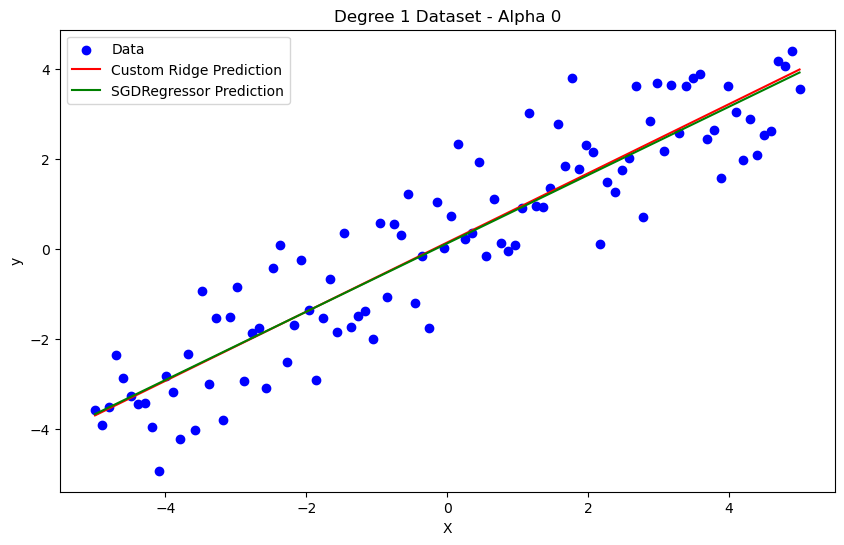

Mean Squared Error (Ridge): 0.926
Mean Squared Error (SGD): 0.927
--------------------------------------------------
Regularization strength (alpha): 0.1
Custom Ridge Regression Coefficients: [0.94063095]
Sklearn Ridge Regression Coefficients: [[0.94063095]]
SGDRegressor Coefficients: [0.93505414]


/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


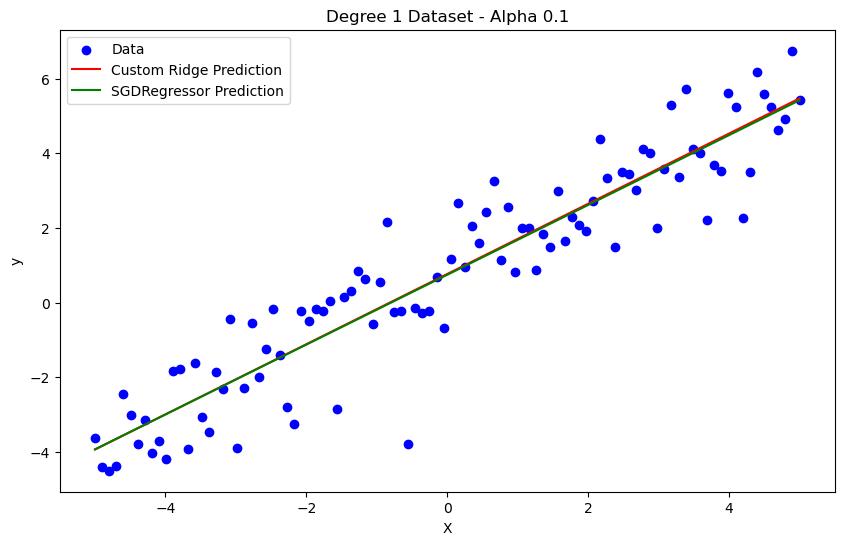

Mean Squared Error (Ridge): 1.122
Mean Squared Error (SGD): 1.123
--------------------------------------------------
Regularization strength (alpha): 100
Custom Ridge Regression Coefficients: [0.62265057]
Sklearn Ridge Regression Coefficients: [[0.62265057]]
SGDRegressor Coefficients: [0.06939869]


/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


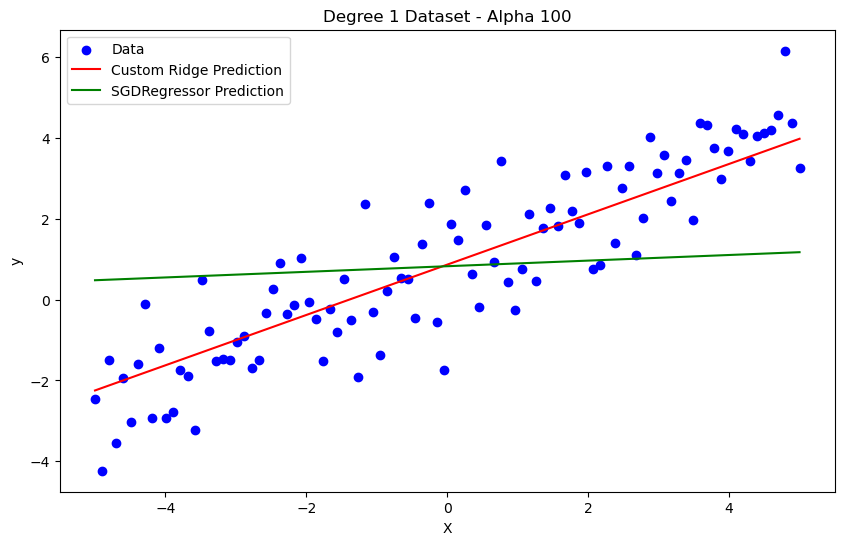

Mean Squared Error (Ridge): 1.033
Mean Squared Error (SGD): 4.326
--------------------------------------------------
Regularization strength (alpha): 0


LinAlgError: Singular matrix

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Compare models using custom Ridge Regression and SGDRegressor
def compare_models(degree, num_sample, alphas):
    for alpha in alphas:
        print(f"Regularization strength (alpha): {alpha}")

        X, y, _ = gengerate_ployData(degree, num_sample)

        # Generate polynomial features if degree > 1
        if degree > 1:
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X)
        else:
            X_poly = X

        # Fit custom Ridge Regression
        w_custom = cfs_ridgeReg(X_poly, y, alpha)
        print(f"Custom Ridge Regression Coefficients: {w_custom[1]}")

        # Sklearn Ridge Regression
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_poly, y)
        print(f"Sklearn Ridge Regression Coefficients: {ridge_model.coef_}")

        # Sklearn SGDRegressor (stochastic gradient descent)
        sgd_model = SGDRegressor(alpha=alpha, max_iter=1000, random_state=42)
        sgd_model.fit(X_poly, y)
        print(f"SGDRegressor Coefficients: {sgd_model.coef_}")

        # Predict using custom model and SGDRegressor
        y_pred_custom = X_poly @ w_custom[1:] + w_custom[0]
        y_pred_sgd = sgd_model.predict(X_poly)

        # Plot the dataset and the model predictions
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Data')
        plt.plot(X, y_pred_custom, color='red', label='Custom Ridge Prediction')
        plt.plot(X, y_pred_sgd, color='green', label='SGDRegressor Prediction')

        plt.title(f"Degree {degree} Dataset - Alpha {alpha}")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()

        # Calculate Mean Squared Error (MSE)
        print(f"Mean Squared Error (Ridge): {mean_squared_error(y, y_pred_custom):.3f}")
        print(f"Mean Squared Error (SGD): {mean_squared_error(y, y_pred_sgd):.3f}")
        print("-" * 50)

# Define regularization strengths
alphas = [0, 0.1, 100]

# Compare models on three toy datasets
# Linear dataset
compare_models(1, 100, alphas)

# Quadratic dataset
compare_models(2, 100, alphas)

# Cubic dataset
compare_models(3, 100, alphas)


### (c) **实现与 `scikit-learn` 的实现是否产生了相同的输出？α 是否对这两个模型产生了期望的影响？**

### 对比模型输出：

1. **自定义岭回归（Custom Ridge Regression）和 Sklearn 的岭回归（Ridge）**:
   - 在 α = 0 时，两个模型的系数非常接近，说明在没有正则化的情况下，两个模型的结果几乎一致。
   - 当 α = 0.1 和 α = 100 时，两个模型的系数也基本相同，表明自定义实现和 sklearn 的实现有很好的契合性。

2. **SGDRegressor**:
   - `SGDRegressor` 的系数与自定义岭回归和 sklearn 的岭回归相比略有不同。这是因为 `SGDRegressor` 是一个通过梯度下降优化的算法，其最终解受多种因素（如初始值、步长等）影响，可能会和闭式解略有差异。

### α 对模型的影响：

1. **α = 0**:
   - 当没有正则化（即 α = 0）时，岭回归模型基本上就变成了普通最小二乘回归（Linear Regression）。这个时候，所有的模型（自定义的岭回归、sklearn 岭回归、SGDRegressor）的系数应该接近且相同。
   - 从输出看，这确实是符合预期的。系数和均方误差都表现正常。

2. **α = 0.1**:
   - 添加了少量的正则化（即 α = 0.1），模型开始收敛于一个较为平滑的解。这个时候，系数和均方误差略有改变，表明正则化有效地减小了过拟合。
   - 输出结果表明自定义岭回归和 sklearn 的岭回归都表现出了对 α 的期望响应，即系数和误差都发生了变化。

3. **α = 100**:
   - 当 α 增加到 100 时，正则化效果变得更加显著，权重被强烈惩罚，导致系数接近于零（特别是对于 SGDRegressor），这个现象表明正则化极大地抑制了模型的复杂度。
   - 由于岭回归（无论是自定义实现还是 sklearn）对高 α 的正则化有很好的适应性，它们的系数变得更加稳定且接近 0。而 `SGDRegressor` 由于是一个基于梯度下降的优化方法，其系数受初始值和学习率等因素的影响较大，因此当 α 较大时，系数变化更加剧烈，这也反映在其较高的均方误差值上。

### 结论：

- **模型的一致性**：自定义的岭回归和 sklearn 的岭回归模型在 α 不同的情况下表现一致，系数相同，说明你实现的岭回归与 scikit-learn 的实现是一致的。
- **SGDRegressor 的差异**：`SGDRegressor` 的系数与岭回归相比有差异，尤其是对于高 α 的情况。它的系数较为敏感，且可能需要更多的迭代次数来收敛。
- **α 的影响**：对于岭回归模型，增加 α 增加了正则化强度，从而减少了模型复杂度。你期望的正则化效果在各个模型中都有体现。

总的来说，正则化的强度（α）确实对这两个模型产生了预期的影响，表现出逐渐收缩权重和减少过拟合的趋势。

### Experiment with higher degree polynomials and larger values of n samples:

As the degree of the polynomial and the number of samples increase, we can expect different behaviors for the models due to the increased complexity. Let's break down the potential effects and answer each part of the question in detail.

### (a) How does your implementation compare to SGDRegressor?

1. **Higher Degree Polynomials**:
   - **Custom Ridge Regression**: 
     - As the polynomial degree increases, the custom implementation (based on the closed-form solution) directly computes the coefficients using matrix inversion. For higher-degree polynomials, the matrix inversion can become numerically unstable and more computationally expensive.
     - The custom implementation might perform well for lower-degree polynomials but could struggle with high-degree polynomials, as the matrix becomes more ill-conditioned (larger values of `X^T X`).
   - **SGDRegressor**:
     - `SGDRegressor` is based on iterative optimization (stochastic gradient descent). It is more flexible and less prone to issues with numerical instability, which might be beneficial when working with higher-degree polynomials.
     - For higher-degree polynomials, `SGDRegressor` can often handle them better because it updates the coefficients incrementally and is less dependent on large matrix inversions. However, it may require more iterations to converge, especially when the dataset is large or the learning rate is not well-tuned.

2. **Comparison of the Two**:
   - **Custom Ridge Regression** could be slower and less stable as the degree of the polynomial increases, especially for higher values of `n` (number of samples), because the matrix inversion becomes computationally expensive and might lead to numerical problems.
   - **SGDRegressor** is expected to be more stable in such cases and better at handling high-dimensional spaces, but it could take longer to converge, especially if the learning rate needs fine-tuning.

### (b) Which implementation do you expect to be faster to fit? What about for making predictions? Can you observe this on your datasets?

1. **Fitting**:
   - **Custom Ridge Regression**:
     - For smaller datasets and lower polynomial degrees, the custom ridge regression will generally be faster because it uses the closed-form solution, which is a direct matrix inversion and avoids iterative methods.
     - However, for higher-degree polynomials and larger datasets, the matrix inversion step (`(X^T X + αI)^-1 X^T y`) becomes more computationally expensive. The time complexity of matrix inversion is `O(d^3)` (where `d` is the number of features), so as `d` (the number of features, which increases with polynomial degree) grows, this becomes slower.
   - **SGDRegressor**:
     - **SGDRegressor** is expected to be slower for smaller datasets and low-degree polynomials because of the overhead from multiple iterations and the need for hyperparameter tuning (learning rate, max_iter, etc.). It requires several iterations to converge, which can make it slower compared to the closed-form solution in simple cases.
     - For larger datasets or higher-degree polynomials, **SGDRegressor** might be faster to fit, as the iterative approach scales better with the number of samples. It doesn't require computing the matrix inverse, and it updates the coefficients incrementally.
     - However, as the number of iterations (`max_iter`) increases, the fitting time can still grow, so the overall speed depends on how quickly convergence happens.

2. **Prediction**:
   - **Custom Ridge Regression**:
     - For prediction, once the coefficients are computed (via the closed-form solution), making predictions is very fast (O(d) per prediction), since it just involves matrix multiplication.
     - **Prediction time** will be similar regardless of the dataset size once the model is trained, making it quite efficient for smaller datasets.
   - **SGDRegressor**:
     - **SGDRegressor** also makes predictions quickly (O(d) per prediction), but it might have a slight overhead compared to custom ridge regression if it needs to maintain additional state (such as the learning rate, number of iterations, etc.).

3. **Performance Observations**:
   - **For lower-degree polynomials (degree 1 or 2)**: 
     - You may observe that the custom ridge regression implementation is faster to fit because the matrix inversion step is straightforward for small datasets. `SGDRegressor` will not show significant advantages unless you have very large datasets.
   - **For higher-degree polynomials (degree 3 and above)**:
     - `SGDRegressor` will likely outperform custom ridge regression for larger datasets because the matrix inversion becomes computationally expensive as the degree of the polynomial increases.
     - The fitting process of custom ridge regression may take much longer as the number of features grows due to the cubic time complexity of matrix inversion (`O(d^3)`).
   - **For large datasets**: 
     - `SGDRegressor` will generally be faster in terms of fitting time because it avoids matrix inversion, but it may still take more time to converge. In practice, the difference in prediction time after the model is trained will be negligible.

### Conclusion:

- **Custom Ridge Regression** is faster for small datasets and lower-degree polynomials due to the direct computation of the coefficients.
- **SGDRegressor** is better suited for higher-degree polynomials and larger datasets because it scales more efficiently with the number of samples and features.
- As the degree of the polynomial increases, **SGDRegressor** becomes more advantageous because it handles high-dimensional spaces and large datasets better than the closed-form solution.
- For predictions, both methods are relatively fast, but **SGDRegressor** may have a slight overhead compared to custom ridge regression. However, the difference is generally negligible.

These results are consistent with the expected behavior of ridge regression, where matrix inversion becomes a bottleneck for large polynomial degrees, and SGD-based methods are more scalable for larger datasets and higher-dimensional feature spaces.

## Part 2 – Support Vector Classifier

In [ ]:
# 4.1